In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from numpy.linalg import svd

plt.rcParams['figure.figsize']=[25,12]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


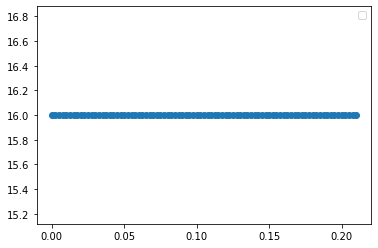

84


In [2]:
dir = './BHNEWNTU3_16_4_1.0_4.9_0.005_100'

ds = []
imax = 0
E_AB_WE_aah, E_AB_NS_aah = [], []
E_BA_WE_aah, E_BA_NS_aah = [], []
E_AB_WE_aha, E_AB_NS_aha = [], []
E_BA_WE_aha, E_BA_NS_aha = [], []
N0_A,N1_A,N2_A,N0_B,N1_B,N2_B=[],[],[],[],[],[]
E_A_N,E_B_N,E_A_NN,E_B_NN=[],[],[],[]
aa, ts, yerr = [], [], []
chis = []
NTUerrs, CTMerrs = [], []

SPECS = dict(np.load(dir + "/SPECS.npz"))
for i in range(10000):
    try:
        dist=1
        env = dict(np.load(dir+"/RHOA_{:05d}.npz".format(i)))
        corrAAH_WE = dict(np.load(dir + "/CORR_AAH_WE_{:05d}.npz".format(i)))
        corrAHA_WE = dict(np.load(dir + "/CORR_AHA_WE_{:05d}.npz".format(i)))
        corrAAH_NS = dict(np.load(dir + "/CORR_AAH_NS_{:05d}.npz".format(i)))
        corrAHA_NS = dict(np.load(dir + "/CORR_AHA_NS_{:05d}.npz".format(i)))
        corrNN_NS = dict(np.load(dir + "/CORR_NN_NS_{:05d}.npz".format(i)))
        PEPS = dict(np.load(dir + ('/PEPS_{:05d}.npz'.format(i))))
    except:
        continue
    ts.append(i * PEPS['dt'] / 2)

    yerr.append(env['error'].real)
    E_AB_WE_aha.append(corrAHA_WE['corA'][dist])
    E_AB_WE_aah.append(corrAAH_WE['corA'][dist])
    E_BA_WE_aha.append(corrAHA_WE['corB'][dist])
    E_BA_WE_aah.append(corrAAH_WE['corB'][dist])
    E_AB_NS_aha.append(corrAHA_NS['corA'][dist])
    E_AB_NS_aah.append(corrAAH_NS['corA'][dist])
    E_BA_NS_aha.append(corrAHA_NS['corB'][dist])
    E_BA_NS_aah.append(corrAAH_NS['corB'][dist])
    E_A_N.append(np.trace(env['rhoA'] @ np.diag(np.arange(0,PEPS['A'].shape[-1]))))
    E_B_N.append(np.trace(env['rhoB'] @ np.diag(np.arange(0,PEPS['A'].shape[-1]))))
    E_A_NN.append(np.trace(env['rhoA'] @ np.diag(np.arange(0,PEPS['A'].shape[-1])**2)))
    E_B_NN.append(np.trace(env['rhoB'] @ np.diag(np.arange(0,PEPS['A'].shape[-1])**2)))
    NTUerrs.append((np.sqrt(np.abs(PEPS['NTUerror']))/PEPS['dt']))
    chis.append(env['C_NE_A'].shape[-1])
    imax=i

ts=np.array(ts)
yerr = np.array(yerr)
E_A_N = np.array(E_A_N)
E_B_N = np.array(E_B_N)
E_A_NN = np.array(E_A_NN)
E_B_NN = np.array(E_B_NN)
E_AB_WE_aha = np.array(E_AB_WE_aha)
E_AB_WE_aah = np.array(E_AB_WE_aah)
E_BA_WE_aha = np.array(E_BA_WE_aha)
E_BA_WE_aah = np.array(E_BA_WE_aah)
E_AB_NS_aha = np.array(E_AB_NS_aha)
E_AB_NS_aah = np.array(E_AB_NS_aah)
E_BA_NS_aha = np.array(E_BA_NS_aha)
E_BA_NS_aah = np.array(E_BA_NS_aah)
N0_A = np.array(N0_A)
N0_B = np.array(N0_B)
N1_A = np.array(N1_A)
N1_B = np.array(N1_B)
N2_A = np.array(N2_A)
N2_B = np.array(N2_B)
NTUerrs = np.array(NTUerrs)

average = (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah+E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah).real/4

for D in range(5,9):
    f = open("./dat_open(1)/dat_open/sudden_quench_peps/dat_U19.6_D"+str(D)+"_mu0.371/dat_grep_adaga","r")
    lines = f.readlines()
    data = []
    for l in lines:
        ll=l[:-1].split(' ')
        data.append([float(ll[0]),float(ll[6])])
    data = np.array(data).T
    ds = np.array(ds).T
    # plt.plot(data[0]*0.005,2*data[1],label=str(D),marker='x')

# plt.plot(d[0],d[1])
# plt.plot(ts,average/2)
# plt.scatter(ts,average,label='C^sp_1',marker='+')
# plt.scatter(ts,(E_A_NN+E_B_NN-2*E_A_N-2*E_B_N+2).real/2,label='VarN średnie',marker='+')
# plt.scatter(ts,average-1/((E_A_NN+E_B_NN-E_A_N-E_B_N)[1]/average[1]).real*(E_A_NN+E_B_NN-E_A_N-E_B_N).real,label='energia')
# plt.scatter(ts,(E_A_N+E_B_N-2).real,label='N średnie')
# plt.scatter(ts, NTUerrs, label = 'delta')
# plt.plot([0,0.5],[0,0],linestyle='--',color='k')
# plt.xlim((-0.005,0.1))
# plt.plot(np.linspace(0,0.1,100),SPECS['U']*4*4*2*np.linspace(0,0.1,100)**2,linestyle='--')
# plt.plot(np.linspace(0,0.1,100),16*np.linspace(0,0.1,100)**2,linestyle='--')
plt.scatter(ts,chis)
plt.legend()
plt.show()
print(imax)

In [23]:
s = np.flip(np.sort(np.random.rand(10)))
s = s / s[0]
print(s)
eps = 0.3
print(np.where(s > s[0] * eps, 1/np.sqrt(s), 0))

[1.         0.9956315  0.93844966 0.77811487 0.63857514 0.45454617
 0.39231844 0.31357197 0.24259892 0.07774412]
[1.         1.00219143 1.03227286 1.13364778 1.25139379 1.48323854
 1.59654307 1.78579409 0.         0.        ]


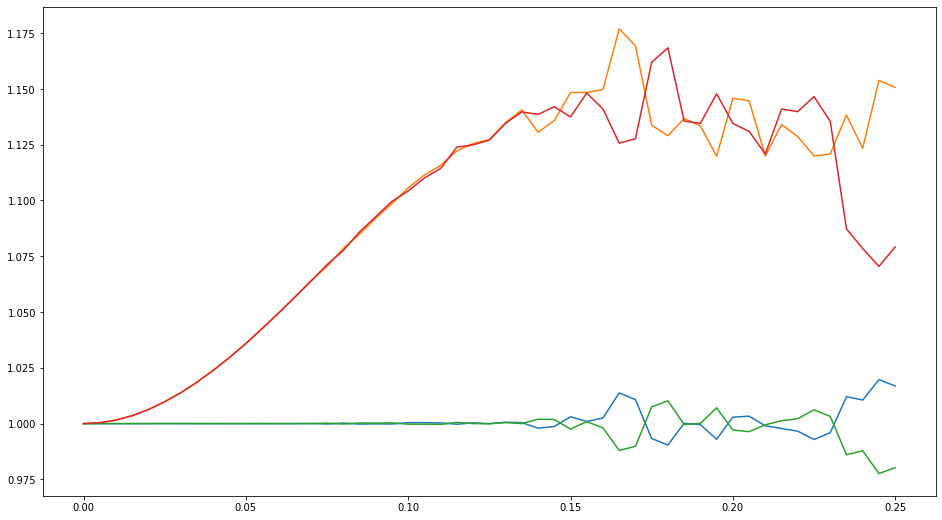

In [65]:
plt.plot(ts,E_A_N.real)
plt.plot(ts,E_A_NN.real)
plt.plot(ts,E_B_N.real)
plt.plot(ts,E_B_NN.real)

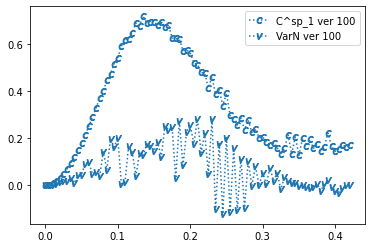

85

In [3]:
for D in range(5,9):
    f = open("./dat_open(1)/dat_open/sudden_quench_peps/dat_U70.0_D"+str(D)+"_mu0.371/dat_grep_adaga","r")
    lines = f.readlines()
    data = []
    maxit, itt = 17, 0
    for l in lines:
        itt+=1
        ll=l[:-1].split(' ')
        data.append([float(ll[0]),float(ll[6])])
        if itt>maxit:break
    data = np.array(data).T
    # ds = np.array(ds).T
    # plt.plot(data[0]*0.005,2*data[1],label=str(D),marker='x')


colors = ['C'+str(x) for x in range(10)]
# for n,dir in enumerate(['./BHNEW5swapAB_16_4_1.0_4.9_0.005_50','./BHNEW5swapAB_32_8_1.0_4.9_0.005_50','./BHNEW5swapAB_24_6_1.0_4.9_0.005_50','./BHNEW5swapAB_12_3_1.0_4.9_0.005_99','./BHNEW5swapAB_8_2_1.0_4.9_0.005_100','./BHNEW5swapAB_1_1_1.0_4.9_0.005_100']):
# for n,dir in enumerate(['./BHNEW5swapAB_32_8_1.0_17.5_0.005_50','./BHNEW5swapAB_16_4_1.0_17.5_0.005_50','./BHNEW5swapAB_24_6_1.0_17.5_0.001_500']):
# for n,dir in enumerate(['./BHNEW5swapAB_16_4_1.0_0.0_0.005_50','./BHNEW5swapAB_20_5_1.0_0.0_0.005_50','./BHNEW5swapAB_24_6_1.0_0.0_0.005_50','./BHNEW5swapAB_28_7_1.0_0.0_0.005_50']):
# for n,dir in enumerate(['./SVDU/BHNEW5swapAB_4_1_1.0_4.9_0.005_100','./SVDU/BHNEW5swapAB_8_2_1.0_4.9_0.005_100','./SVDU/BHNEW5swapAB_12_3_1.0_4.9_0.005_100','./SVDU/BHNEW5swapAB_16_4_1.0_4.9_0.005_100','./SVDU/BHNEW5swapAB_32_8_1.0_4.9_0.005_100']):
for n,dir in enumerate(['./BHNEWNTU3_16_4_1.0_4.9_0.005_100']):
    ds = []
    imax = 0
    E_AB_WE_aah, E_AB_NS_aah = [], []
    E_BA_WE_aah, E_BA_NS_aah = [], []
    E_AB_WE_aha, E_AB_NS_aha = [], []
    E_BA_WE_aha, E_BA_NS_aha = [], []
    N0_A,N1_A,N2_A,N0_B,N1_B,N2_B=[],[],[],[],[],[]
    E_A_N,E_B_N,E_A_NN,E_B_NN=[],[],[],[]
    aa, ts, yerr = [], [], []
    NTUerrs, CTMerrs, SVDUerrs = [], [], []

    SPECS = dict(np.load(dir + "/SPECS.npz"))
    for i in range(800):
        try:
            dist=1
            env = dict(np.load(dir+"/RHOA_{:05d}.npz".format(i)))
            corrAAH_WE = dict(np.load(dir + "/CORR_AAH_WE_{:05d}.npz".format(i)))
            corrAHA_WE = dict(np.load(dir + "/CORR_AHA_WE_{:05d}.npz".format(i)))
            corrAAH_NS = dict(np.load(dir + "/CORR_AAH_NS_{:05d}.npz".format(i)))
            corrAHA_NS = dict(np.load(dir + "/CORR_AHA_NS_{:05d}.npz".format(i)))
            corrNN_NS = dict(np.load(dir + "/CORR_NN_NS_{:05d}.npz".format(i)))
            PEPS = dict(np.load(dir + ('/PEPS_{:05d}.npz'.format(i))))
        except:
            continue
        ts.append(i * PEPS['dt'])

        yerr.append(env['error'].real)
        E_AB_WE_aha.append(corrAHA_WE['corA'][dist])
        E_AB_WE_aah.append(corrAAH_WE['corA'][dist])
        E_BA_WE_aha.append(corrAHA_WE['corB'][dist])
        E_BA_WE_aah.append(corrAAH_WE['corB'][dist])
        E_AB_NS_aha.append(corrAHA_NS['corA'][dist])
        E_AB_NS_aah.append(corrAAH_NS['corA'][dist])
        E_BA_NS_aha.append(corrAHA_NS['corB'][dist])
        E_BA_NS_aah.append(corrAAH_NS['corB'][dist])
        E_A_N.append(np.trace(env['rhoA'] @ np.diag(np.arange(0,PEPS['A'].shape[-1]))))
        E_B_N.append(np.trace(env['rhoB'] @ np.diag(np.arange(0,PEPS['A'].shape[-1]))))
        E_A_NN.append(np.trace(env['rhoA'] @ np.diag(np.arange(0,PEPS['A'].shape[-1])**2)))
        E_B_NN.append(np.trace(env['rhoB'] @ np.diag(np.arange(0,PEPS['A'].shape[-1])**2)))
        N0_A.append(env['rhoA'][0,0])
        N0_B.append(env['rhoB'][0,0])
        N1_A.append(env['rhoA'][1,1])
        N1_B.append(env['rhoB'][1,1])
        N2_A.append(env['rhoA'][2,2])
        N2_B.append(env['rhoB'][2,2])
        NTUerrs.append((np.sqrt(np.abs(PEPS['NTUerror']))/PEPS['dt']))
        SVDUerrs.append((np.sqrt(np.abs(PEPS['SVDUerror']))/PEPS['dt']))
        CTMerrs.append(env['error'])
        imax=i

    ts=np.array(ts)
    yerr = np.array(yerr)
    E_A_N = np.array(E_A_N)
    E_B_N = np.array(E_B_N)
    E_A_NN = np.array(E_A_NN)
    E_B_NN = np.array(E_B_NN)
    E_AB_WE_aha = np.array(E_AB_WE_aha)
    E_AB_WE_aah = np.array(E_AB_WE_aah)
    E_BA_WE_aha = np.array(E_BA_WE_aha)
    E_BA_WE_aah = np.array(E_BA_WE_aah)
    E_AB_NS_aha = np.array(E_AB_NS_aha)
    E_AB_NS_aah = np.array(E_AB_NS_aah)
    E_BA_NS_aha = np.array(E_BA_NS_aha)
    E_BA_NS_aah = np.array(E_BA_NS_aah)
    N0_A = np.array(N0_A)
    N0_B = np.array(N0_B)
    N1_A = np.array(N1_A)
    N1_B = np.array(N1_B)
    N2_A = np.array(N2_A)
    N2_B = np.array(N2_B)
    NTUerrs = np.array(NTUerrs)
    SVDUerrs = np.array(SVDUerrs)

    Csp1 = (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah+E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah).real/4
    VarN = (E_A_NN+E_B_NN-2*E_A_N-2*E_B_N+2).real/2
    NNmN = (E_A_NN+E_B_NN-E_A_N-E_B_N).real/2
    N = (E_A_N+E_B_N).real/2-1
    energy = SPECS['U']*4/2*NNmN - Csp1*2

    plt.plot(ts,Csp1,label='C^sp_1 ver '+dir.split('_')[-1],marker='$C$', color=colors[n],linestyle=':')
    plt.plot(ts,4.9 * VarN,label='VarN ver '+dir.split('_')[-1],marker='$V$', color=colors[n],linestyle=':')
    # plt.plot(ts,NNmN,label='NNmN '+dir.split('_')[2],marker='$V$', color=colors[n],linestyle=':')
    # plt.plot(ts,(E_A_NN-E_A_N).real,label='NNmN '+dir.split('_')[2],marker='$A$', color=colors[n],linestyle=':')
    # plt.plot(ts,(E_B_NN-E_B_N).real,label='NNmN '+dir.split('_')[2],marker='$B$', color=colors[n],linestyle=':')
    # plt.plot(ts,N,label='N '+dir.split('_')[2],marker='$N$', color=colors[n],linestyle=':')
    # plt.plot(ts,energy,label='Energy '+dir.split('_')[2],marker='$E$', color=colors[n],linestyle=':')
    # plt.plot(ts,len(ts)*[0])
    # plt.plot(ts, (E_A_N+E_B_N).real/2,label='N'+dir.split('_')[2],marker='$N$', color='C4',linestyle=':')
    # plt.plot(ts,NTUerrs,color=colors[n],label='delta    '+dir.split('_')[2], marker='$N$')
    # plt.plot(ts,SVDUerrs,color=colors[n],label='delta_0  '+dir.split('_')[2], marker='$S$')

    # plt.plot(ts,E_A_NN.real-1, marker="$A$", color=colors[n], linestyle=':',label='N2'+dir.split('_')[2])
    # plt.plot(ts,E_B_NN.real-1, marker="$B$", color=colors[n], linestyle=':',label='N2'+dir.split('_')[2])
    # plt.plot(ts, E_AB_NS_aah)
    # plt.plot(ts, E_BA_NS_aah)
    # plt.plot(ts, E_AB_WE_aah)
    # plt.plot(ts, E_BA_WE_aah)
    # plt.plot(ts, E_AB_NS_aha)
    # plt.plot(ts, E_BA_NS_aha)
    # plt.plot(ts, E_AB_WE_aha)
    # plt.plot(ts, E_BA_WE_aha)
    # plt.legend()
    # plt.show()

plt.legend()
# plt.plot(np.linspace(0,0.04,100),4*4*np.linspace(0,0.04,100)**2)
# plt.yscale('log')
# plt.xlim((-0.01,0.25))
# plt.ylim((-0.00005,0.00005))
plt.show()
# print(imax)
len(ts)

In [28]:
dir = './BHNEW5swapABcorectederror_16_4_1.0_4.9_0.005_90'
obs = dict(np.load(dir + '/NTUOBS.npz'))
data = {}
for key in list(obs):
    if key == 'ts':
        data[key] = obs[key]
        continue
    data[key] = []
    for n in range(len(obs[key])):
        data[key].append(np.mean(obs[key][n]))
    data[key] = np.array(data[key])

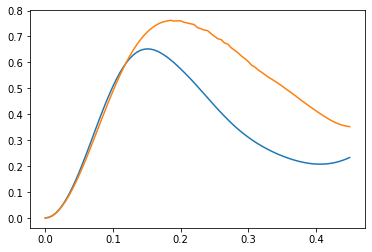

In [39]:
plt.plot(data['ts'],data['E_a_ah']/data['E']+data['E_ah_a']/data['E'])
plt.plot(data['ts'],4.9*(data['E_nn']/data['E'] - 1))

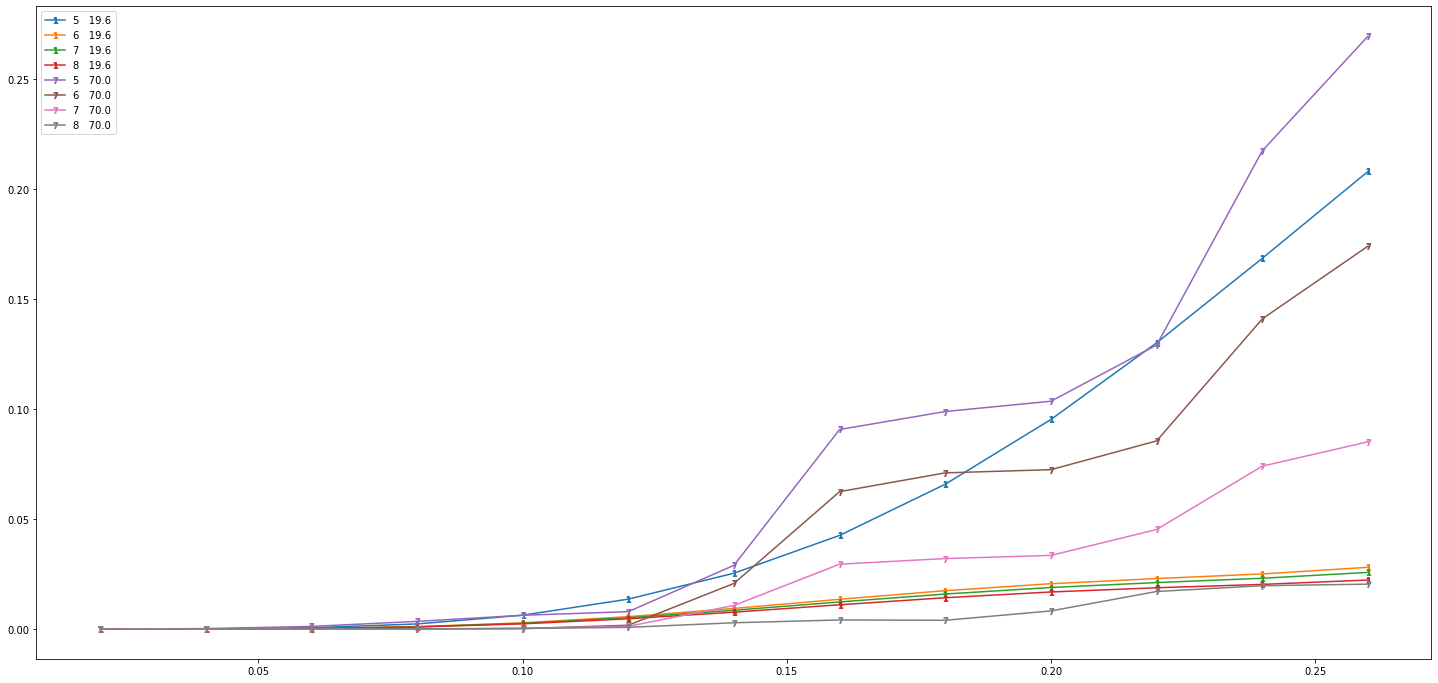

In [47]:
for U in [19.6,70.0]:
    for D in range(5,9):
        f = open("./dat_open(1)/dat_open/sudden_quench_peps/dat_U" + str(U) + "_D"+str(D)+"_mu0.371/dat_grep_ene_t","r")
        lines = f.readlines()
        data = []
        maxit, itt = 12, 0
        for l in lines:
            itt+=1
            ll=l[:-1].split(' ')
            data.append([float(ll[0]),float(ll[6]) + float(ll[3])])
            if itt>maxit:break
        data = np.array(data).T
        plt.plot(data[0]*0.005,2*data[1],label=str(D)+"   "+str(U),marker='$'+str(U)[0]+'$')
plt.legend()
plt.show()

In [8]:
np.tanh(100)

1.0